# Camera calibration and 3D reconstruction

In [1]:
import cv2 as cv
print("OpenCV version:", cv.__version__)

import numpy as np
import matplotlib.pyplot as plt

from calibration import detect_dictionary, estimate_intrinsic, estimate_extrinsic

OpenCV version: 4.9.0


## Camera calibration

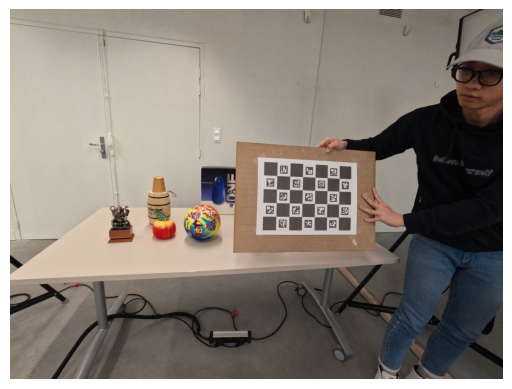

In [2]:
img = cv.imread("captures/front/GOPR0055.JPG")
nrows, ncols, _ = img.shape
img_size = (ncols, nrows)

plt.imshow(np.flip(img, axis=2))
_ = plt.axis('off')

In [3]:
detect_dictionary(img)

Detected 2 markers for DICT_4X4_1000
Detected 17 markers for DICT_6X6_50
Detected 17 markers for DICT_6X6_100
Detected 17 markers for DICT_6X6_250
Detected 17 markers for DICT_6X6_1000


In [4]:
dictionary = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_6X6_50)

Create a `CharucoBoard` object.

In [5]:
# Measured from the used ChArUco board
SQUARE_LENGTH = 0.0525
MARKER_LENGTH = 0.0310

SQUARE_X = 5
SQUARE_Y = 7

size = (SQUARE_X, SQUARE_Y)
board = cv.aruco.CharucoBoard(size, SQUARE_LENGTH, MARKER_LENGTH, dictionary)

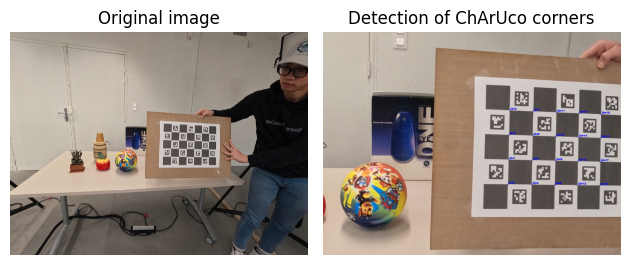

In [6]:
charuco_params = cv.aruco.CharucoParameters()
charuco_params.tryRefineMarkers = False
detector_params = cv.aruco.DetectorParameters()
detector = cv.aruco.CharucoDetector(board, charuco_params, detector_params)
charuco_corners, charuco_ids, _, _ = detector.detectBoard(img)

draw_img = np.copy(img)
out_img = cv.aruco.drawDetectedCornersCharuco(draw_img, charuco_corners, charuco_ids)

# Calculate the dimensions of the clipped portion
height, width, _ = img.shape
clip_width = width // 3  # 50% into each dimension
clip_height = height // 3  # 50% into each dimension

# Define the coordinates of the top-left and bottom-right corners of the clipped portion
x1 = clip_width
y1 = clip_height
x2 = width - clip_width
y2 = height - clip_height

# Clip the portion of the image defined by the calculated dimensions
clipped_portion = out_img[y1:y2, x1:x2]

fig, axes = plt.subplots(1, 2)

# Display the images in the subplots
axes[0].imshow(np.flip(img, axis=2))
axes[0].set_title('Original image')

axes[1].imshow(np.flip(clipped_portion, axis=2))
axes[1].set_title('Detection of ChArUco corners')

# Hide the axes
for ax in axes:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

Estimate intrinsic parameters and distortion coefficients for each camera

In [7]:
front_ids = range(55, 63)
front_paths = list(map(lambda id: f"captures/front/GOPR00{id}.JPG", front_ids))

_, f_mtx, f_dist = estimate_intrinsic(front_paths, board, img_size)

[>] Detected 24 ChArUco corners in GOPR0055.JPG
[>] Detected 24 ChArUco corners in GOPR0056.JPG
[>] Detected 24 ChArUco corners in GOPR0057.JPG
[>] Detected 24 ChArUco corners in GOPR0058.JPG
[>] Detected 24 ChArUco corners in GOPR0060.JPG
[>] Detected 15 ChArUco corners in GOPR0061.JPG
[>] Detected 3 ChArUco corners in GOPR0062.JPG
[!] Point matching discarded for GOPR0062.JPG
---- Result ----
Intrinsic parameters:
[[2.62340491e+03 0.00000000e+00 2.83485069e+03]
 [0.00000000e+00 2.62260739e+03 2.05267399e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
[[ 1.26541793e-01 -1.66750482e+00 -5.46157313e-03  6.53135928e-03
   6.72769876e+00]]
Reprojection error:
0.600010536158918


In [8]:
right_ids = range(72, 82)
right_paths = list(map(lambda id: f"captures/right/GOPR00{id}.JPG", right_ids))

ret, r_mtx, r_dist = estimate_intrinsic(right_paths, board, img_size)

[>] Detected 22 ChArUco corners in GOPR0072.JPG
[>] Detected 14 ChArUco corners in GOPR0073.JPG
[>] Detected 22 ChArUco corners in GOPR0074.JPG
[>] Detected 24 ChArUco corners in GOPR0075.JPG
[>] Detected 24 ChArUco corners in GOPR0077.JPG
[>] Detected 22 ChArUco corners in GOPR0078.JPG
[>] Detected 4 ChArUco corners in GOPR0079.JPG
[>] Detected 24 ChArUco corners in GOPR0080.JPG
[>] Detected 24 ChArUco corners in GOPR0081.JPG
---- Result ----
Intrinsic parameters:
[[2.61625103e+03 0.00000000e+00 2.86497148e+03]
 [0.00000000e+00 2.58817454e+03 2.10616804e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
[[-0.02400818 -0.04225257 -0.00244928  0.007879    0.05296593]]
Reprojection error:
0.6011632116836444


In [9]:
front_img = cv.imread("captures/front/GOPR0052.JPG")
nrows, ncols, _ = img.shape
img_size = (ncols, nrows)
estimate_extrinsic(front_img, f_mtx, f_dist, board, img_size)

[>] Detected 24 ChArUco corners
---- Result ----
Rotation vectors:
(array([[ 0.28942917],
       [ 0.02894002],
       [-1.55221116]]),)
Translation vectors:
(array([[-0.40403015],
       [-0.16845983],
       [ 1.6745053 ]]),)
Reprojection error:
0.14773756953725184


In [10]:
right_img = cv.imread("captures/right/GOPR0072.JPG")
nrows, ncols, _ = img.shape
img_size = (ncols, nrows)
estimate_extrinsic(right_img, r_mtx, r_dist, board, img_size)

[>] Detected 22 ChArUco corners
---- Result ----
Rotation vectors:
(array([[ 0.76860411],
       [ 0.73521087],
       [-1.41214807]]),)
Translation vectors:
(array([[-0.34248324],
       [-0.1600923 ],
       [ 7.14253817]]),)
Reprojection error:
0.7918857301572454


## Stereo reconstruction

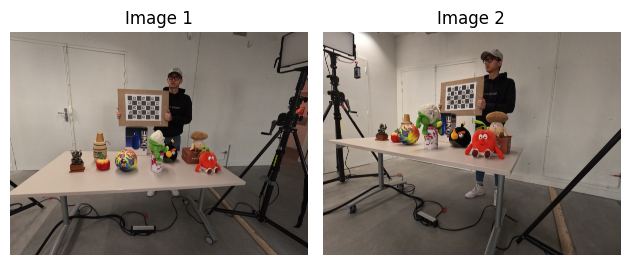

In [10]:
img_1 = cv.imread("captures/front/GOPR0052.JPG")
img_2 = cv.imread("captures/right/GOPR0072.JPG")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2)

# Display the images in the subplots
axes[0].imshow(np.flip(img_1, axis=2))
axes[0].set_title('Image 1')

axes[1].imshow(np.flip(img_2, axis=2))
axes[1].set_title('Image 2')

# Hide the axes
for ax in axes:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

In [11]:
sift = cv.SIFT_create()

Find the keypoints and descriptors with SIFT

In [12]:
kp_1, des_1 = sift.detectAndCompute(img_1, None)
kp_2, des_2 = sift.detectAndCompute(img_2, None)

FLANN parameters

In [13]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des_1, des_2, k=2)

In [14]:
pts_1 = []
pts_2 = []
 
# Ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.8 * n.distance:
        pts_2.append(kp_2[m.trainIdx].pt)
        pts_1.append(kp_1[m.queryIdx].pt)

In [15]:
pts_1 = np.array(pts_1)
pts_2 = np.array(pts_2)

print(pts_1.shape)
print(pts_2.shape)

(1058, 2)
(1058, 2)


In [16]:
from scipy.interpolate import griddata


def densify_point_cloud(point_cloud):
    # You can use interpolation methods to densify the point cloud
    # For example, you can use griddata from scipy.interpolate
    # Note: You may need to install scipy package

    # Generate grid points for interpolation
    x = np.linspace(min(point_cloud[:, 0]), max(point_cloud[:, 0]), 100)
    y = np.linspace(min(point_cloud[:, 1]), max(point_cloud[:, 1]), 100)
    xx, yy = np.meshgrid(x, y)

    # Interpolate z values
    zz = griddata(point_cloud[:, :2], point_cloud[:, 2], (xx, yy), method='cubic')

    # Combine interpolated x, y, z coordinates
    densified_point_cloud = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))

    return densified_point_cloud

In [17]:
from scipy.spatial import KDTree


def remove_outliers(point_cloud, k_neighbors=10, std_dev_threshold=2.0):
    # Construct a KD tree for efficient nearest neighbor search
    kdtree = KDTree(point_cloud)

    # Query k-nearest neighbors for each point
    distances, _ = kdtree.query(point_cloud, k=k_neighbors)

    # Compute the mean and standard deviation of distances for each point
    mean_distances = np.mean(distances, axis=1)
    std_dev_distances = np.std(distances, axis=1)

    # Identify outliers based on standard deviation threshold
    is_outlier = std_dev_distances > std_dev_threshold

    # Remove outliers
    filtered_point_cloud = point_cloud[~is_outlier]

    return filtered_point_cloud

In [18]:
_, E, R, t, mask = cv.recoverPose(pts_1, pts_2, f_mtx, f_dist, r_mtx, r_dist, method=cv.RANSAC, prob=0.999, threshold=1.0)

In [19]:
P1 = np.hstack((np.eye(3), np.zeros((3, 1))))
P2 = np.hstack((R, t))

# Convert the projection matrices to the camera coordinate system
P1 = f_mtx @ P1
P2 = f_mtx @ P2

points4D = cv.triangulatePoints(P1, P2, pts_1.T, pts_2.T)
points3D = cv.convertPointsFromHomogeneous(points4D.T)
points3D = points3D[:, 0, :]

In [20]:
cloud = densify_point_cloud(remove_outliers(points3D))

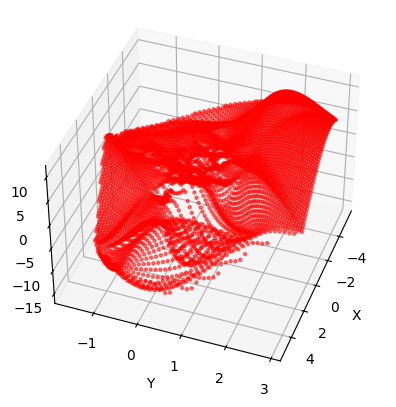

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D points
ax.scatter(cloud[:, 0], cloud[:, 1], cloud[:, 2], marker='o', s=5, c='r', alpha=0.5)

# Configure the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=40, azim=20)
plt.show()

In [22]:
_, _, _, _, triangulated_points = cv.recoverPose(E=E, points1=pts_1, points2=pts_2, cameraMatrix=f_mtx, R=R, t=t, distanceThresh=1.0, mask=mask, triangulatedPoints=None)

In [23]:
print(triangulated_points.shape)
points_3D = triangulated_points / triangulated_points[3]
points_3D = points_3D[:3, :].T

(4, 1058)


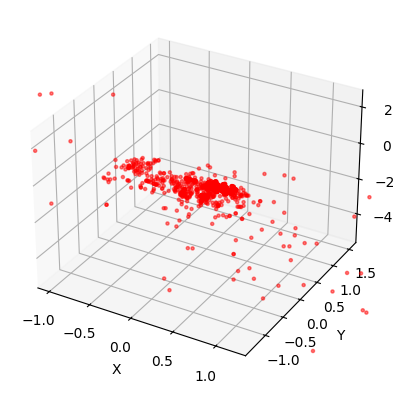

In [24]:
# Compute centroid of point clouds
centroid = np.mean(points_3D, axis=0)

# Compute zoom factor (adjust as needed)
zoom_factor = 1.0

# Compute new limits for the axes
x_min = centroid[0] - zoom_factor * np.std(points_3D[:, 0])
x_max = centroid[0] + zoom_factor * np.std(points_3D[:, 0])
y_min = centroid[1] - zoom_factor * np.std(points_3D[:, 1])
y_max = centroid[1] + zoom_factor * np.std(points_3D[:, 1])
z_min = centroid[2] - zoom_factor * np.std(points_3D[:, 2])
z_max = centroid[2] + zoom_factor * np.std(points_3D[:, 2])

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D points within the adjusted limits
ax.scatter(points_3D[:, 0], points_3D[:, 1], points_3D[:, 2], marker='o', s=5, c='r', alpha=0.5)

# Set the limits for the axes
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

# Configure the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

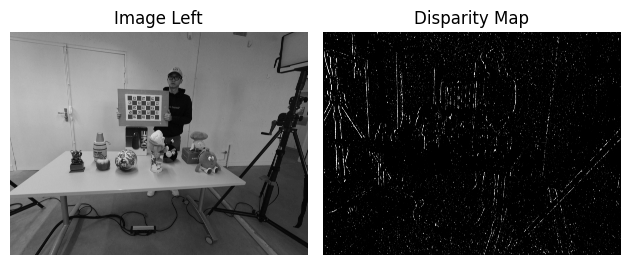

In [25]:
img_l = cv.imread("captures/front/GOPR0052.JPG", cv.IMREAD_GRAYSCALE)
img_r = cv.imread("captures/right/GOPR0072.JPG", cv.IMREAD_GRAYSCALE)


stereo = cv.StereoBM.create(numDisparities=16, blockSize=21)
disparity = stereo.compute(img_l, img_r)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2)

# Display the images in the subplots
axes[0].imshow(img_l, 'gray')
axes[0].set_title('Image Left')

axes[1].imshow(disparity, 'gray')
axes[1].set_title('Disparity Map')

# Hide the axes
for ax in axes:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

In [26]:
focal_length = f_mtx[0][0] / 100  # Focal length in pixels (adjust based on your camera)
baseline = 1  # Baseline between the cameras (adjust based on your setup)

# Generate grid of (x, y) pixel coordinates
h, w = img_l.shape
y, x = np.indices((h, w))

depth = baseline * focal_length / (disparity + 1e-6)  # Avoid division by zero

X = (x - w / 2) * depth / focal_length
Y = (y - h / 2) * depth / focal_length
Z = depth

point_cloud = np.dstack((X, Y, Z))

In [27]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(X, Y, Z, s=1)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud Visualization')

# Show plot
plt.show()

KeyboardInterrupt: 

(array([[4176.,    0.,    0., ...,    0.,    0.,    0.],
        [4176.,    0.,    0., ...,    0.,    0.,    0.],
        [4176.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [4176.,    0.,    0., ...,    0.,    0.,    0.],
        [4176.,    0.,    0., ...,    0.,    0.,    0.],
        [4176.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([-1.63962817e+02,  2.62340344e+08,  5.24680851e+08,  7.87021359e+08,
         1.04936187e+09,  1.31170237e+09,  1.57404288e+09,  1.83638339e+09,
         2.09872390e+09,  2.36106440e+09,  2.62340491e+09]),
 <a list of 5568 BarContainer objects>)

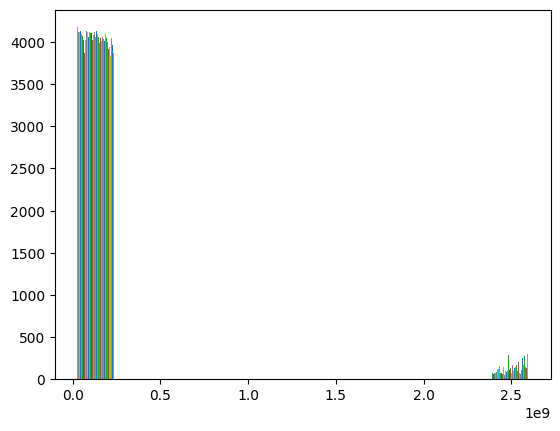

In [ ]:
plt.hist(Z)